In [14]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
data = pd.read_csv('DATABEFOREPERCENTILE.csv')

In [16]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [17]:
mis = data.isnull().sum()
mis

Country Name                                                                0
Time                                                                        0
Exports of goods and services (% of GDP)                                    0
Foreign direct investment, net inflows (% of GDP)                           0
GDP (current US$)                                                           0
GDP growth (annual %)                                                       0
GDP per capita (current US$)                                                0
GDP per capita growth (annual %)                                            0
Inflation, GDP deflator (annual %)                                          0
Trade (% of GDP)                                                            0
Imports of goods and services (% of GDP)                                    0
Gross capital formation (annual % growth)                                   0
Unemployment, total (% of total labor force) (modeled ILO estima

In [18]:
import pandas as pd
import numpy as np

def load_and_preprocess_data(data):
    data['Time'] = pd.to_datetime(data['Time'], format='%Y')
    data = data.set_index('Time')
    return data

data = load_and_preprocess_data(data)

country_data = data[data['Country Name'] == 'South Africa']
indicator_series = country_data['GDP (current US$)']

train_data = indicator_series['2003':'2019']
validation_data = indicator_series['2020':'2023']


In [19]:
train_data.head(20)

Time
2003-01-01    1.970190e+11
2004-01-01    2.558069e+11
2005-01-01    2.888672e+11
2006-01-01    3.038587e+11
2007-01-01    3.330771e+11
2008-01-01    3.161313e+11
2009-01-01    3.297541e+11
2010-01-01    4.173638e+11
2011-01-01    4.581995e+11
2012-01-01    4.344005e+11
2013-01-01    4.008860e+11
2014-01-01    3.811989e+11
2015-01-01    3.467098e+11
2016-01-01    3.235855e+11
2017-01-01    3.814488e+11
2018-01-01    4.052607e+11
2019-01-01    3.893300e+11
Name: GDP (current US$), dtype: float64

In [20]:
validation_data

Time
2020-01-01    3.382914e+11
2021-01-01    4.201178e+11
2022-01-01    4.052709e+11
Name: GDP (current US$), dtype: float64

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def fit_holts_linear_trend(series, forecast_periods):
    model = ExponentialSmoothing(series, trend='add',damped_trend=True, seasonal=None).fit()
    forecast = model.forecast(forecast_periods)
    return model, forecast

model_holt, forecast_holt = fit_holts_linear_trend(train_data, len(validation_data))


/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/sahilbhardwaj/Desktop/UCL/Programming/Anaconda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSE
rmse = mean_squared_error(validation_data, forecast_holt, squared=False)

# MAPE
mape = np.mean(np.abs((validation_data - forecast_holt) / validation_data)) * 100

# MAD
mad = mean_absolute_error(validation_data, forecast_holt)

print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f'MAD: {mad}')


RMSE: 36046724285.27762
MAPE: 7.832438585664669
MAD: 27924377943.740215


# ACTUAL VALUES

In [23]:
indicator_series

Time
2003-01-01    1.970190e+11
2004-01-01    2.558069e+11
2005-01-01    2.888672e+11
2006-01-01    3.038587e+11
2007-01-01    3.330771e+11
2008-01-01    3.161313e+11
2009-01-01    3.297541e+11
2010-01-01    4.173638e+11
2011-01-01    4.581995e+11
2012-01-01    4.344005e+11
2013-01-01    4.008860e+11
2014-01-01    3.811989e+11
2015-01-01    3.467098e+11
2016-01-01    3.235855e+11
2017-01-01    3.814488e+11
2018-01-01    4.052607e+11
2019-01-01    3.893300e+11
2020-01-01    3.382914e+11
2021-01-01    4.201178e+11
2022-01-01    4.052709e+11
Name: GDP (current US$), dtype: float64

# Holt's Values 

In [24]:
forecast_holt

2020-01-01    3.984318e+11
2021-01-01    4.073063e+11
2022-01-01    4.160921e+11
Freq: AS-JAN, dtype: float64

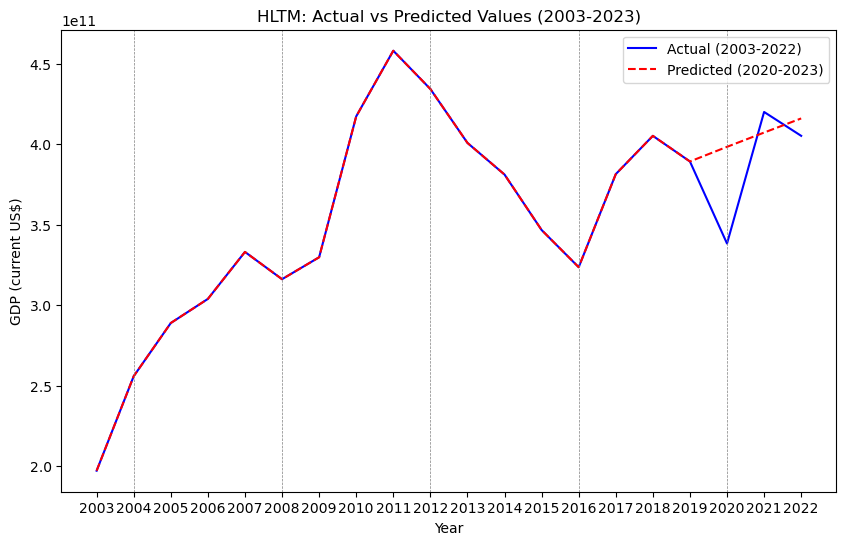

In [26]:
import matplotlib.pyplot as plt
import numpy as np

actual_values_1 = country_data.loc['2003':'2022', 'GDP (current US$)'].values

forecast_holt_1 = forecast_holt

combined_values_1 = np.concatenate([actual_values_1[:17], forecast_holt])

years_actual = list(range(2003, 2023))  # 2003-2022
years_combined = list(range(2003, 2020)) + list(range(2020, 2023))  # 2003-2019 for actuals + 2020-2022 for predictions

plt.figure(figsize=(10, 6))
plt.plot(years_actual, actual_values_1, label='Actual (2003-2022)', color='blue')
plt.plot(years_combined, combined_values_1, label='Predicted (2020-2023)', linestyle='--', color='red')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.legend()
plt.title('HLTM: Actual vs Predicted Values (2003-2023)')

plt.xticks(np.arange(2003, 2023, 1))

for year in range(2004, 2023, 4):
    plt.axvline(x=year, color='gray', linestyle='--', linewidth=0.5)
plt.savefig('/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files/METHODOLOGY AND EVALS /Percentile and Scoring/EVALUATION - FORECASTING/plots/holts_actual_vs_predicted.png') 
plt.show()
plt.show()


In [27]:
print(os.getcwd())

/Users/sahilbhardwaj/AA - PUSH VC/Dissertation Files/METHODOLOGY AND EVALS /Percentile and Scoring/EVALUATION - FORECASTING
